# Palmer Penguins

***

This notebook contains my analysis of the famous Palmer Penguins dataset.

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



![Palmer Island Image](penguins.jpeg)

![Bill lenght and Bill depth](https://www.neuraldesigner.com/images/penguin_culmen_depth.webp)

# Imports

***

The following imports were used during the course of this project. 

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large multi-dimensional arrays and matrices. It also supplies a large collecion of high-level mathematical functions to opperate on these arrays. [NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in conjunction with its numerical mathematics extension NumPy.



In [26]:
#Data Frames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

****

Load the palmer penguins data set from a URL.

In [2]:
#Load the penguins dataset.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded, and we can inspect it

In [3]:
#Look at this data
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Inspect data
***

In [4]:
# Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [5]:
#Sex of penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [6]:
#Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [7]:
#Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Histograms

### Bill length

The following code will plot a histogram of the bill-length of each species of penguin in a different colour. Here we are using the object orientated approach to doing this with matplotlib. Firstly we are creating new dataframe with each distinct species of penguins and then we are creating a plot consisting of the bill length vs frequency for each species of penguin in a different colour.

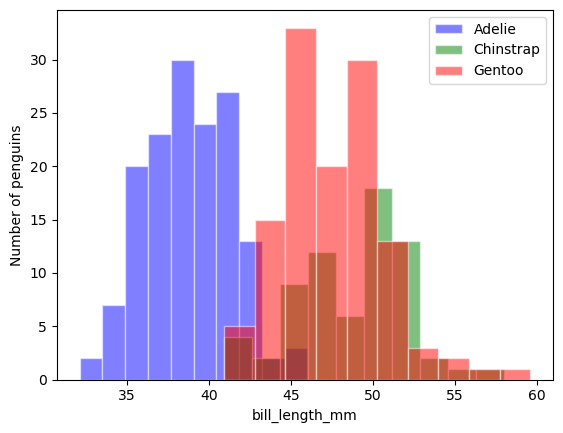

In [48]:
adelie = df[df.species == "Adelie"] #Create a new data frame with only the Adelie penguins.
chinstrap = df[df.species=='Chinstrap'] #Create a new data frame with only the Chinstrap penguins.
Gentoo = df[df.species=='Gentoo']   #Create a new data frame with only the Gentoo penguins.

fig, ax = plt.subplots() #Create a new figure and axis. 

variable = "bill_length_mm" #Choose a variable to plot the histogram of.

ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") #Plot a histogram of the variable for the Adelie penguins. bins=10 means that the histogram will have 10 bins. 
                                                                            #alpha=0.5 means that the bars will be semi-transparent. alpha=1 would mean that the bars are opaque.
                                                                            #alpha=0 would mean that the bars are completely transparent.
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10,  label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable) #Set the x-axis label.
ax.set_ylabel("Number of penguins") #Set the y-axis label.
ax.legend() #Show the legend.


plt.show() #Show the plot.



Seaborn makes things much easier for us. We could do the same as above by using the simple seaborn code below


<Axes: xlabel='bill_length_mm', ylabel='Count'>

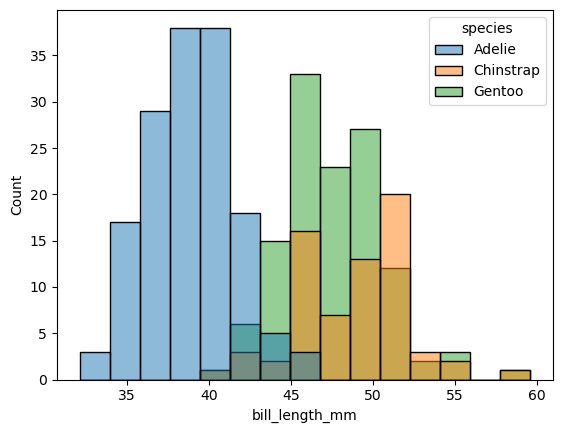

In [45]:
sns.histplot(df, x="bill_length_mm",  stat='count', bins=15, hue="species")

### Bill depth

We can use the same approach as above to plot a histogram of the bill depth for each species of penguin.



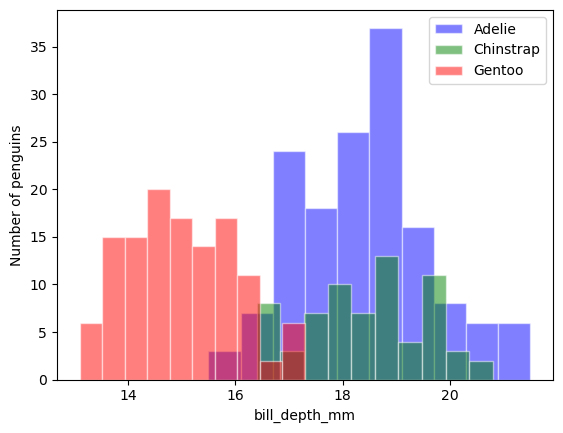

In [54]:
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species=='Chinstrap']
Gentoo = df[df.species=='Gentoo']

fx, ax = plt.subplots()

variable = "bill_depth_mm"

ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") 
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10, label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable)
ax.set_ylabel("Number of penguins")
ax.legend()

plt.show()


Or by using the seaborn histplot code.....

<Axes: xlabel='bill_depth_mm', ylabel='Count'>

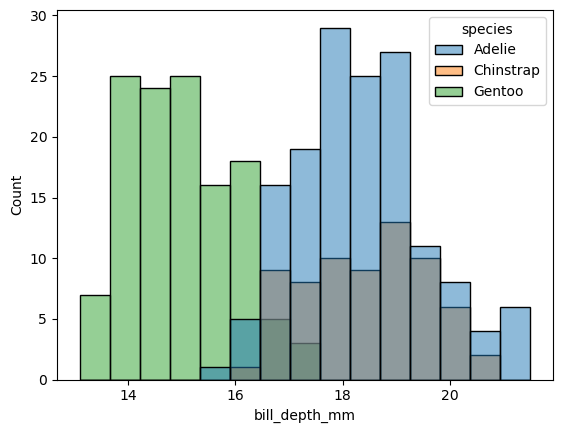

In [52]:
sns.histplot(df, x="bill_depth_mm",  stat='count', bins=15, hue="species")

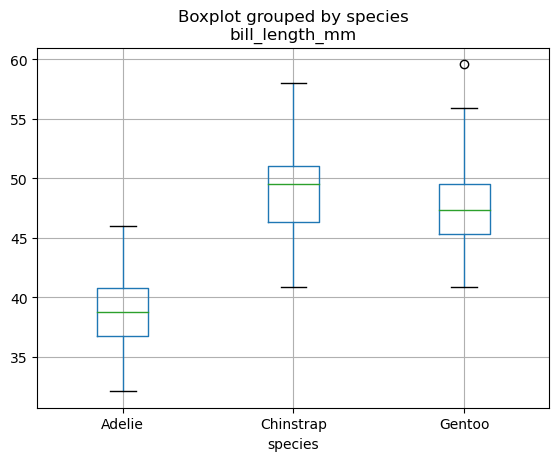

In [9]:
boxplot = df.boxplot(column=['bill_length_mm'], by='species')    

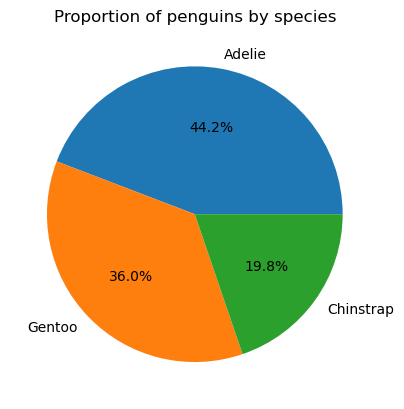

In [10]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

species_counts = df['species'].value_counts()
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%') #autopct='%1.1f%%' means that the percentages will be shown on the pie chart.
plt.title('Proportion of penguins by species')
plt.show()

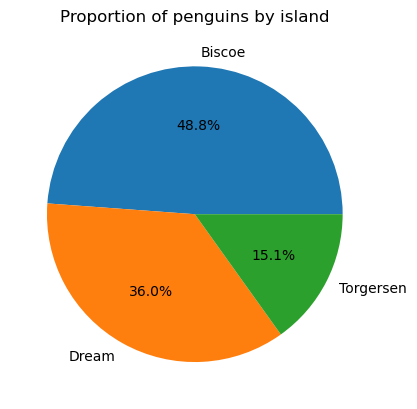

In [11]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

island_counts = df['island'].value_counts()
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%')
plt.title('Proportion of penguins by island')
plt.show()

In [25]:

plt.figure(figsize=(12,7))
plt.bar(df, x='species', y = df.species.index, color = 'blue', hue = 'Sex', height =0.8)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species count')
plt.show()

TypeError: bar() got multiple values for argument 'x'

<Figure size 1200x700 with 0 Axes>

# Heading One
## Heading Two
### Heading Three

This is just a paragraph. This is just the way a paragraph is generated in Markdown. There is nothing special about creating a paragraph. Just leave a blank space before you begin and another one when you are done, and that is interpreted as a paragraph.

To italicsise text just put one star before and after like this *example*. To make it bold put two stars in front and behind as in the following **example**.

For bullted lists just use the minus sign as below

- This is a list
- Another item on the list

To use a numbered list just put 1. in front of the items in the list.

1. This is a numbered list
1. This is another item on the numbered list
1. This is another item on the numbered list. Rendering will automatically number the list correctly

#Tables

| Species   |  Bill length (mm) | Body Mass (g) |
|-----------|-------------------|---------------|
| Adelie    |                   |               |
| Chinstrap |                   |               |
| Gentoo    |                   |               |


_This is an italic print_

**_This is bold and italic print_**

Two spaces after your text puts a soft break on that line so you can quote lines of a poem like so.

Does any man dream,    
That a gael can fear.  
Of a thousand deeds,   
Let him learn but one.  

Use the greater than sign for blockquotes......

> Most good programmers do programming not because they expect to get paid or get adulation by the public, but because it is fun to program. **Linus Torvalds**




This readme has being written with [GitHub's documentation on READMEs](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-readmes) in mind. You should refer to that documentation for more information on writing an appropriate README for visitore to your repository.

You can find out more about writing in MarkDown [in GitHub's documentation](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)


<p style="background:black">
<code style="background:black;color:white">C:\Users\Mike> pip3 install roughviz
</code>
</p>

*** 
### End